C:\Users\user\AppData\Local\Temp\ipykernel_5720\1836706963.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return todays_data['Close'][0]
C:\Users\user\AppData\Local\Temp\ipykernel_5720\1836706963.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return todays_data['Close'][0]
C:\Users\user\AppData\Local\Temp\ipykernel_5720\1836706963.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return todays_data['Close'][0]


  Ticker  Shares  Purchase Price  Current Price  Current Value  Investment  \
0   AAPL      10             150     209.320007    2093.200073        1500   
1   MSFT       5             200     405.141998    2025.709991        1000   
2  GOOGL       3            1200     159.809998     479.429993        3600   

     Gain/Loss  
0   593.200073  
1  1025.709991  
2 -3120.570007  
Total Investment: $6100.00
Total Value: $4598.34
Total Gain/Loss: $-1501.66


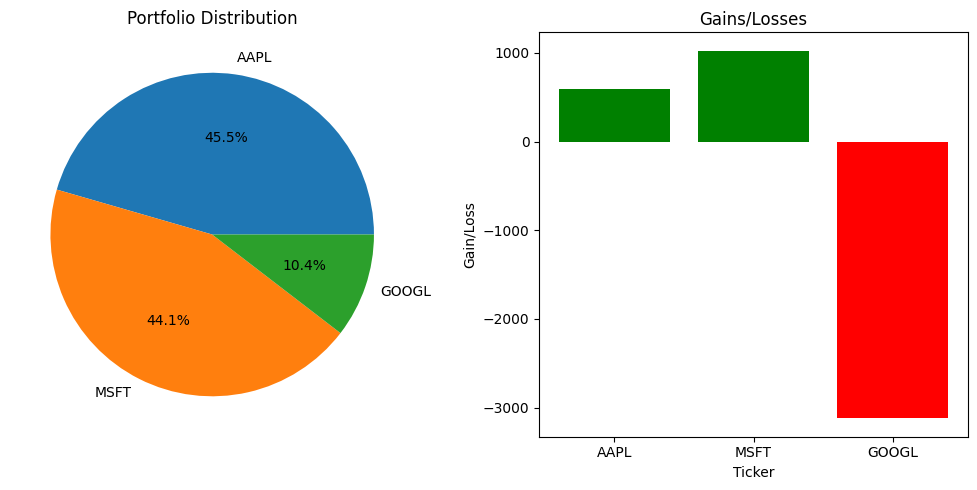

In [2]:
#Bash code :pip install pandas yfinance matplotlib

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define your portfolio
portfolio = {
    'Ticker': ['AAPL', 'MSFT', 'GOOGL'],
    'Shares': [10, 5, 3],
    'Purchase Price': [150, 200, 1200]
}

df = pd.DataFrame(portfolio)

# Fetch current prices
def fetch_current_price(ticker):
    stock = yf.Ticker(ticker)
    todays_data = stock.history(period='1d')
    return todays_data['Close'][0]

df['Current Price'] = df['Ticker'].apply(fetch_current_price)

# Calculate portfolio value
df['Current Value'] = df['Shares'] * df['Current Price']
df['Investment'] = df['Shares'] * df['Purchase Price']
df['Gain/Loss'] = df['Current Value'] - df['Investment']

total_investment = df['Investment'].sum()
total_value = df['Current Value'].sum()
total_gain_loss = df['Gain/Loss'].sum()

print(df)
print(f'Total Investment: ${total_investment:.2f}')
print(f'Total Value: ${total_value:.2f}')
print(f'Total Gain/Loss: ${total_gain_loss:.2f}')

# Visualize the portfolio
plt.figure(figsize=(10, 5))

# Portfolio Distribution
plt.subplot(1, 2, 1)
plt.pie(df['Current Value'], labels=df['Ticker'], autopct='%1.1f%%')
plt.title('Portfolio Distribution')

# Gains/Losses
plt.subplot(1, 2, 2)
plt.bar(df['Ticker'], df['Gain/Loss'], color=['green' if x > 0 else 'red' for x in df['Gain/Loss']])
plt.title('Gains/Losses')
plt.xlabel('Ticker')
plt.ylabel('Gain/Loss')

plt.tight_layout()
plt.show()
